<a href="https://colab.research.google.com/github/RandiBro234/Ensemble-Learning/blob/anjay/Ensemble_Learning_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)

# **BACA DATASET**

In [4]:
print("Silakan upload file heart.csv Anda")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"\nFile '{fn}' berhasil di-upload!")
    df = pd.read_csv(fn)

print("\n===== 5 Baris Pertama =====")
print(df.head())

print("\n===== Informasi Dataset =====")
print(df.info())

print("\n===== Statistik Deskriptif =====")
print(df.describe())

Silakan upload file heart.csv Anda


Saving heart.csv to heart (1).csv

File 'heart (1).csv' berhasil di-upload!

===== 5 Baris Pertama =====
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int6

# **EDA**

/tmp/ipython-input-887221722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='coolwarm')


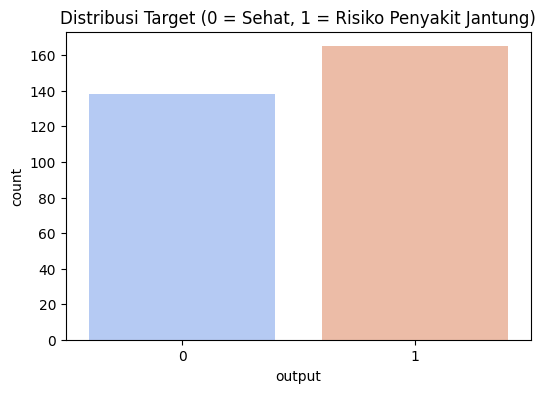

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='output', data=df, palette='coolwarm')
plt.title('Distribusi Target (0 = Sehat, 1 = Risiko Penyakit Jantung)')
plt.show()

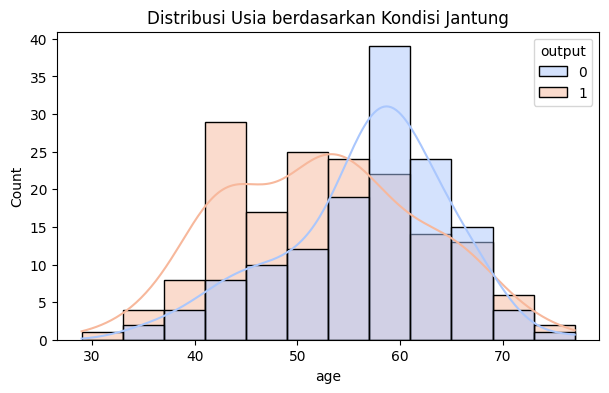

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='output', kde=True, palette='coolwarm')
plt.title('Distribusi Usia berdasarkan Kondisi Jantung')
plt.show()

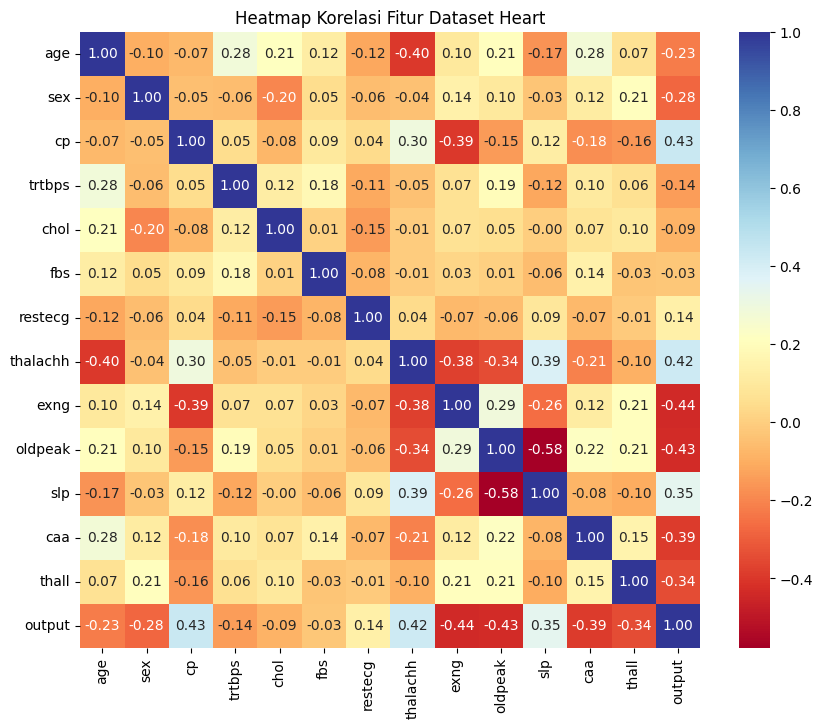

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Dataset Heart')
plt.show()

# **PREPROCESSING**

In [13]:
# Pisahkan fitur dan target
X = df.drop(columns=['output'])
y = df['output']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nUkuran Data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Ukuran Data:
X_train: (242, 13), X_test: (61, 13)


| Aspek                    | Keterangan                                                                             |
| ------------------------ | -------------------------------------------------------------------------------------- |
| **Jumlah total data**    | 303 sampel (242 train, 61 test)                                                        |
| **Jumlah fitur (X)**     | 13 atribut medis                                                                       |
| **Jenis masalah**        | Klasifikasi biner (0 = sehat, 1 = berisiko)                                            |
| **Tujuan preprocessing** | Menyeimbangkan skala fitur & memisahkan data untuk training dan evaluasi               |
| **Hasil**                | Dataset sudah siap untuk modeling dengan Decision Tree, Random Forest, dan Extra Trees |

# **INIALISASI DAN PELATIHAN MODEL**


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



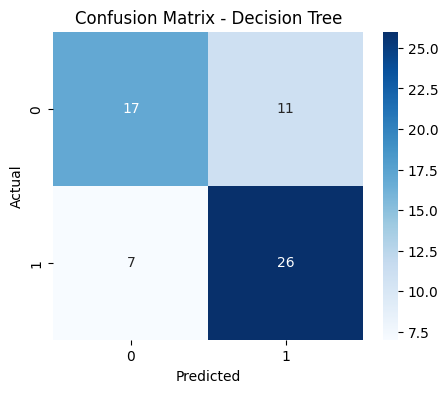


Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



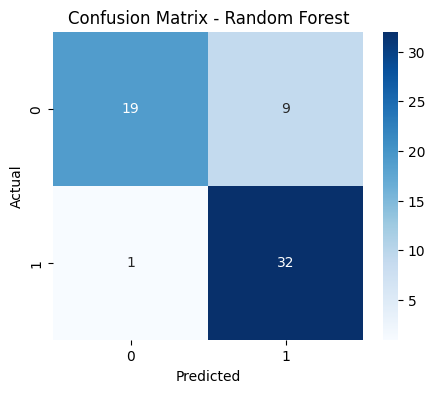


Model: Extra Trees
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



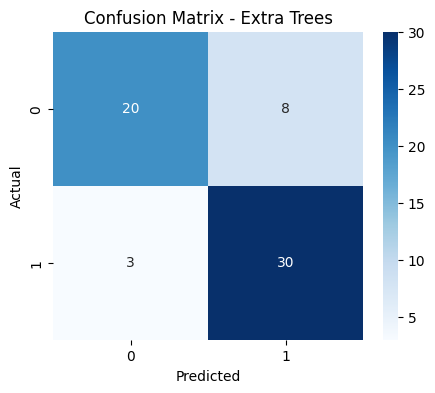

In [16]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===============================")
    print(f"Model: {name}")
    print("===============================")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

| Model             | Jenis                | Accuracy | Precision (avg) | Recall (avg) | F1-Score (avg) | Catatan                          |
| :---------------- | :------------------- | :------- | :-------------- | :----------- | :------------- | :------------------------------- |
| **Decision Tree** | Base                 | 0.70     | 0.71            | 0.70         | 0.70           | Overfitting, performa moderat    |
| **Random Forest** | Bagging              | **0.84** | **0.87**        | **0.82**     | **0.83**       | Akurasi dan stabilitas tertinggi |
| **Extra Trees**   | Bagging (lebih acak) | 0.82     | 0.83            | 0.81         | 0.82           | Performa seimbang antar kelas    |


# **ROC CURVE**

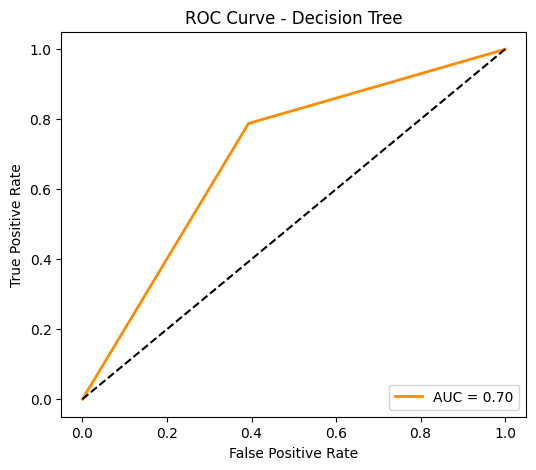

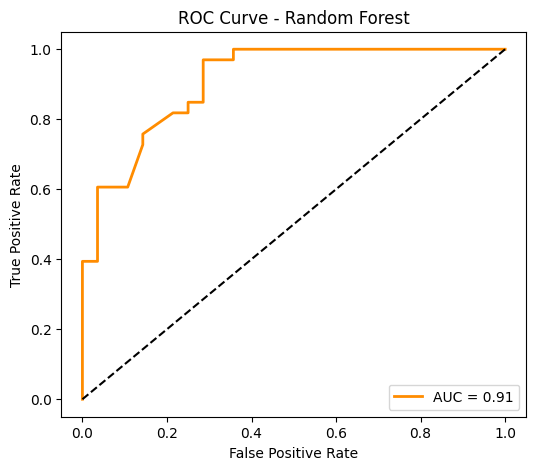

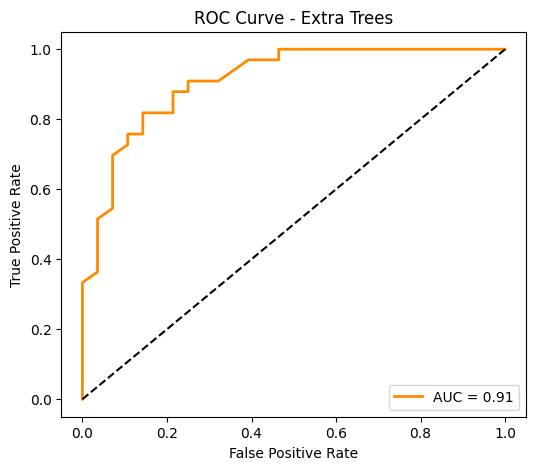

In [17]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

# **LEARNING CURVE**

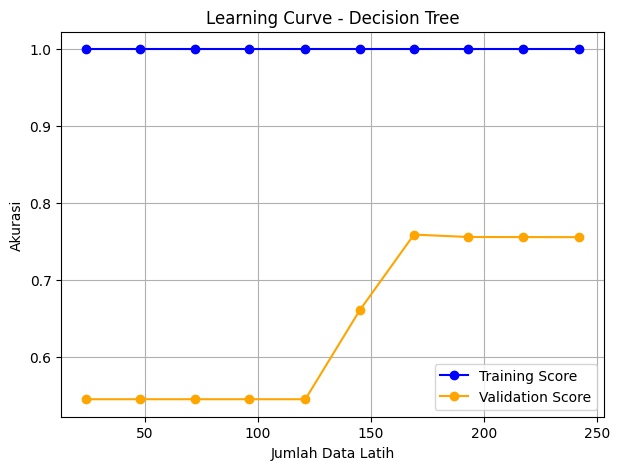

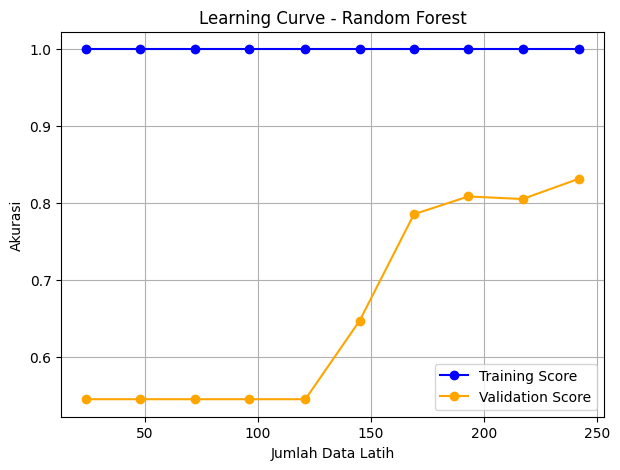

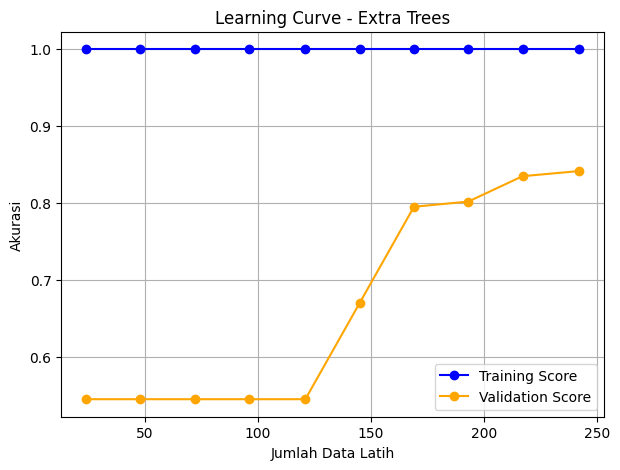

In [18]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Jumlah Data Latih')
    plt.ylabel('Akurasi')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

for name, model in models.items():
    plot_learning_curve(model, X_scaled, y, title=name)